Name : Suraj Chaudhari<br>
Roll No. : 42509<br>
Branch : B.E AI&DS<br>
Batch : B1<br>
Computer Laboratory I : Machine Learning

## Assignment 4 : Clustering Analysis<br>
Implement K-Means clustering on Iris.csv dataset. Determine the number of clusters
using the elbow method.<br>
Dataset Link: https://www.kaggle.com/datasets/uciml/iris


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/Iris.csv')

In [ ]:
df.drop('Id', axis=1 , inplace=True)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
df.nunique()

,0
SepalLengthCm,35
SepalWidthCm,23
PetalLengthCm,43
PetalWidthCm,22
Species,3


In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
x = df.drop(columns=['Species'])

In [ ]:
# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

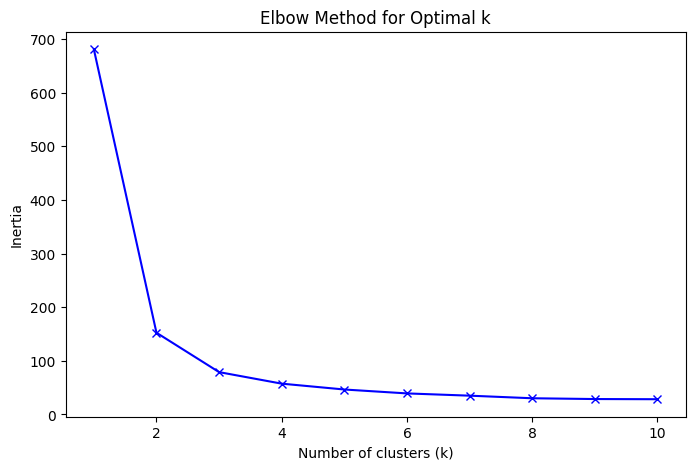

In [ ]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
optimal_k = 3

In [ ]:
# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=10,init='random')
kmeans.fit(x)

KMeans(init='random', n_clusters=3, random_state=10)

In [ ]:
cluster_labels = kmeans.fit_predict(x)

In [35]:
# Add the cluster labels to the original dataset
df['Cluster'] = cluster_labels

# Display the resulting dataset with cluster labels
print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0            5.1           3.5            1.4           0.2  Iris-setosa   
1            4.9           3.0            1.4           0.2  Iris-setosa   
2            4.7           3.2            1.3           0.2  Iris-setosa   
3            4.6           3.1            1.5           0.2  Iris-setosa   
4            5.0           3.6            1.4           0.2  Iris-setosa   

   Cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


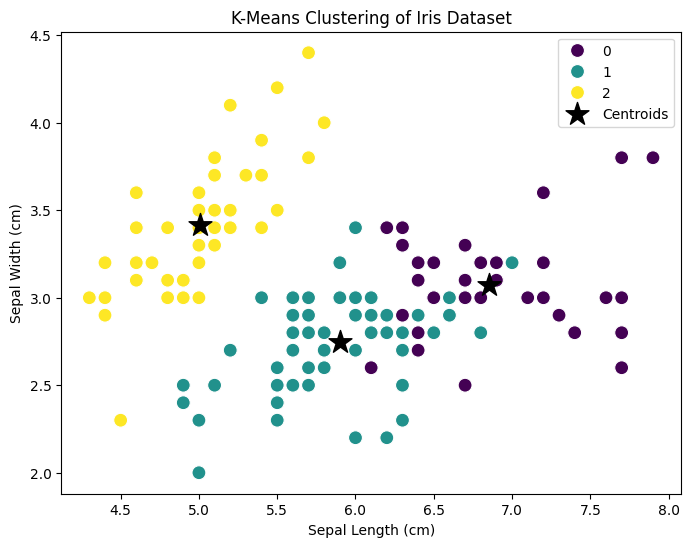

In [36]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Cluster', data=df, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='black', label='Centroids')
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()